In [1]:
import pandas as pd

In [2]:
infile = pd.read_excel("asker.xlsx")

In [3]:
boylam = infile['Boylam'].values.tolist()
enlem = infile['Enlem'].values.tolist()
talep = infile['Talep'].values.tolist()

In [4]:
import networkx as nx

In [5]:
n1 = 30
n2 = 925
G = nx.complete_bipartite_graph(n1,n2)

In [6]:
my_pos = { i : ( boylam[i], enlem[i] ) for i in G.nodes }

In [7]:
# for convenience, suppose that distances are Euclidean
import math
def eucl_dist(x1,y1,x2,y2):
    return math.sqrt( (x1-x2)**2 + (y1-y2)**2 )

n1 = 30
n2 = 925

c = dict()

for i in range(n1):
    for j in range(n1, n1 + n2):
        (x1,y1) = my_pos[i]
        (x2,y2) = my_pos[j]
        c[i,j] = eucl_dist(x1,y1,x2,y2)

In [8]:
import gurobipy as gp
from gurobipy import GRB

In [9]:
# create model
m = gp.Model()
# define variables
x = m.addVars( n1, range(n1, n1 + n2), vtype=GRB.BINARY )  # x[i,j] = 1 if site i covers landmark j
y = m.addVars( n1, vtype=GRB.BINARY )             # y[i] = 1 if an ambulance is sited at i
z = m.addVar()  

# Objective: minimize the worst-case response time
m.setObjective( z, GRB.MINIMIZE )

# Constraint: site k ambulances
#m.addConstr( gp.quicksum(y) == 30 )
# Constraints: cover each landmark j by one ambulance
m.addConstrs( gp.quicksum( x[i,j] for i in range(n1) ) == 1 for j in range(n1, n1 + n2))
# Constraints: if no ambulance placed at site i, it can't cover any landmarks
m.addConstrs( x[i,j] <= y[i] for i in range(n1) for j in range(n1, n1 + n2))
# Constraints: response time for landmark j <= worst-case response time
m.addConstrs( gp.quicksum(talep[j] * c[i,j] * x[i,j] for j in range(n1, n1 + n2) ) <= z for i in range(n1) )
m.addConstrs( gp.quicksum(talep[j] * x[i,j] for j in range(n1, n1 + n2) ) >= 0.02 for i in range(n1) )
m.optimize()

Set parameter Username

--------------------------------------------
--------------------------------------------

Academic license - for non-commercial use only - expires 2023-05-19
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (win64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 28735 rows, 27781 columns and 138780 nonzeros
Model fingerprint: 0xfc53b600
Variable types: 1 continuous, 27780 integer (27780 binary)
Coefficient statistics:
  Matrix range     [2e-08, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e-02, 1e+00]
Found heuristic solution: objective 0.0278680
Presolve removed 27750 rows and 30 columns
Presolve time: 0.15s
Presolved: 985 rows, 27751 columns, 83270 nonzeros
Variable types: 1 continuous, 27750 integer (27750 binary)

Root relaxation: objective 7.856587e-03, 1565 iterations, 0.05 seconds (0.05 work units)

    Nodes    |    Current Node    |     Objective Bounds

In [10]:
import matplotlib.pyplot as plt

[(0, 30), (0, 32), (0, 34), (0, 38), (0, 39), (0, 43), (0, 44), (0, 46), (0, 47), (0, 48), (0, 49), (0, 51), (0, 53), (0, 55), (0, 56), (0, 58), (0, 61), (0, 64), (0, 65), (0, 68), (0, 74), (0, 75), (0, 83), (0, 84), (0, 86), (0, 132), (0, 140), (0, 145), (0, 153), (0, 162), (0, 166), (0, 168), (0, 307), (0, 382), (0, 430), (0, 435), (0, 546), (0, 568), (0, 579), (0, 650), (0, 651), (0, 761), (0, 850), (0, 910), (0, 937), (0, 942), (1, 93), (1, 98), (1, 235), (1, 280), (1, 294), (1, 360), (1, 363), (1, 376), (1, 398), (1, 417), (1, 468), (1, 474), (1, 494), (1, 495), (1, 717), (1, 760), (1, 770), (1, 880), (1, 953), (2, 37), (2, 69), (2, 79), (2, 81), (2, 85), (2, 101), (2, 107), (2, 114), (2, 127), (2, 130), (2, 142), (2, 164), (2, 167), (2, 174), (2, 175), (2, 192), (2, 194), (2, 196), (2, 200), (2, 205), (2, 257), (2, 290), (2, 324), (2, 341), (2, 374), (2, 427), (2, 431), (2, 437), (2, 450), (2, 455), (2, 476), (2, 488), (2, 506), (2, 547), (2, 548), (2, 553), (2, 590), (2, 592), (

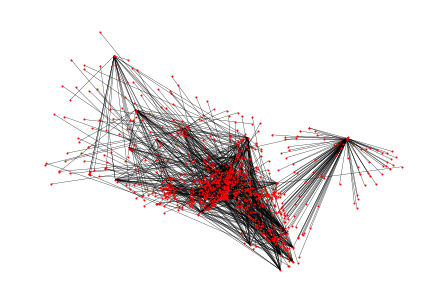

In [11]:
tour_edges = [ (i,j) for i in range (n1) for j in range (n1, n1 + n2) if x[i,j].x > 0.5 ]
print(tour_edges)
nx.draw(G.edge_subgraph(tour_edges), pos=my_pos, node_color='red', node_size=1, width=0.3)
plt.savefig("asker2.png", dpi=1000)

In [12]:
colors = ['red', 'blue', 'green', 'yellow', 'orange', 'purple', 'brown', 'pink', 'gray',
          'olive', 'cyan', 'magenta', 'lime', 'teal', 'maroon', 'navy', 'peru', 'gold',
          'indigo', 'coral', 'crimson', 'darkgreen', 'darkorange', 'darkviolet', 'firebrick',
          'lightblue', 'lightgreen', 'lightcoral', 'lightgray', 'lavender']

In [13]:
G = nx.Graph()
for j in range(n1, n1 + n2):
    for i in range(n1):
        if x[i, j].x > 0.5:
            color = colors[i]
            G.add_node(j, color=color)
            break

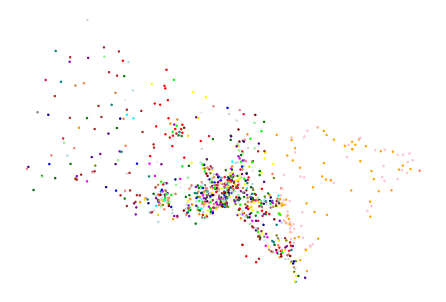

In [14]:
node_colors = [G.nodes[node]['color'] for node in G.nodes()]
nx.draw(G, pos=my_pos, node_color=node_colors, node_size=2, width=0.3)
plt.savefig("asker3.png", dpi=1000)